In [22]:
from dataset import Image_Dataset
from oc_clip import OCClip
from matplotlib import pyplot as plt

In [23]:
dataset = Image_Dataset(split="train", root_dir="/home/benedikthopf/Dokumente/9. Semester/datasets/few-shot-images/AnimalFace-dog/img",
                        resolution=(224, 224), filetype="jpg", max_num_samples=8)


In [24]:
img = dataset[0]["image"]

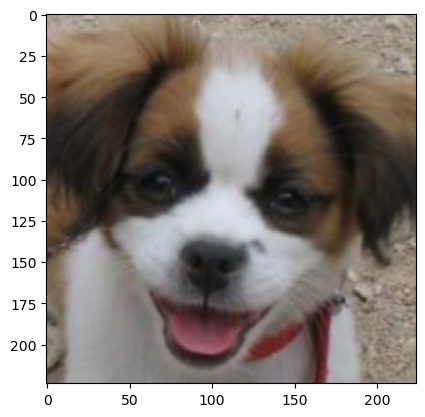

In [25]:
plt.imshow(img.permute(1, 2, 0).numpy())

In [26]:
occlip = OCClip("cpu"
        )

In [27]:
slots, masks = occlip.get_masks(img.unsqueeze(0))

tensor(0.2941) tensor(5.4902e-10)
tensor(0.7675) tensor(3.2638e-10)
tensor(0.9327) tensor(2.5220e-10)
tensor(0.7240) tensor(3.3464e-10)
tensor(0.8810) tensor(3.1470e-10)
tensor(0.4851) tensor(1.3820e-10)
tensor(0.7922) tensor(1.1765e-10)


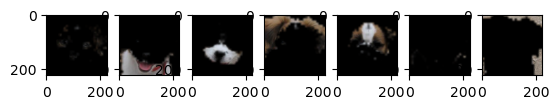

In [30]:
fig, axs = plt.subplots(1, 7)
for ax, mask in zip(axs, masks.squeeze()):
    mask = mask.unsqueeze(2)
    i = img.permute(1, 2, 0)
    mi = mask*i
    print(mi.max(), mi.min())
    ax.imshow(mi.numpy())